In [1]:
import re
import itertools
from string import punctuation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
survey = pd.read_csv('../data/Survey+Response.csv')

In [32]:
survey = survey.dropna(axis=1, how='all')

In [5]:
cols = [
    'waiting_list', 'program', 'tools',
    'r_exp', 'gender', 'editor', 'graphics_exp',
    'advanced_analysis_exp', 'doc_exp',
    'matlab_exp', 'github_exp'
]

In [6]:
survey.columns = cols

In [9]:
tool_arrs = survey.tools.apply(lambda s: s.split(', '))

In [10]:
unique_tools = list(set(itertools.chain(*tool_arrs)))

In [11]:
dummies = pd.DataFrame({t:[] for t in unique_tools})

In [12]:
for ix, row in enumerate(survey.to_dict(orient='records')):
    for tool in unique_tools:
        if tool in row['tools']:
            dummies.ix[ix, tool] = 1
        else:
            dummies.ix[ix, tool] = 0

In [13]:
to_replace = {
    'QMSS (master)': 'QMSS', 
    'Ms in ds': 'IDSE (master)', 
    'MSDS': 'IDSE (master)', 
    'Data Science': 'IDSE (master)',
    'Data Science Certification': 'IDSE (cert)'
}
survey['program'] = survey.program.replace(to_replace)

In [14]:
merged = pd.merge(survey, dummies, left_index=True, right_index=True)

In [15]:
regexp = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))

In [16]:
merged.columns = [re.sub(regexp, '_', col).lower() for col in merged.columns]

### Survey

In [8]:
survey = pd.read_csv('../data/survey_clean.csv')
survey.drop(survey.columns[0], axis=1, inplace=True)

In [93]:
# survey[[c for c in survey.columns if 'exp' in c]]
research_cols = [
    
]

programming_cols = [
    
]

experience_cols = [c for c in survey.columns if 'exp' in c]

In [94]:
exp_cols

['exp.Rmodeling',
 'exp.Rgraphics',
 'exp.Radvanced',
 'exp.documentation',
 'exp.Matlab',
 'exp.Github']

In [108]:
# survey['exp.Rmodeling'].value_counts(normalize=True).plot(kind='bar').set_title('R Modeling Experience')
# plt.ylim([0, 1])

In [109]:
# survey.gender.value_counts(normalize=True).plot(kind='bar').set_title('Proportion of Respondents by Gender')
# plt.ylim([0, 1])

In [110]:
# survey.primaryeditor.value_counts().plot(kind='bar').set_title('Primary Editor Counts')

In [111]:
# merged.ix[:,11:].mean().plot(kind='bar', figsize=(6,4)).set_title('Tool Familiarity')

In [18]:
target_cols = ['program', 'gender'] + list(merged.columns[11:])
to_facet = merged[target_cols]

In [19]:
program_means = to_facet.groupby('program').mean().reset_index()
gender_means = to_facet.groupby('gender').mean().reset_index()

In [20]:
by_program = pd.melt(program_means, id_vars='program')
by_gender = pd.melt(gender_means, id_vars='gender')

In [21]:
# g = sns.FacetGrid(melted, col="program")
# g = g.map(sns.barplot, 'variable', 'value')
# g.set_xticklabels(rotation=90)

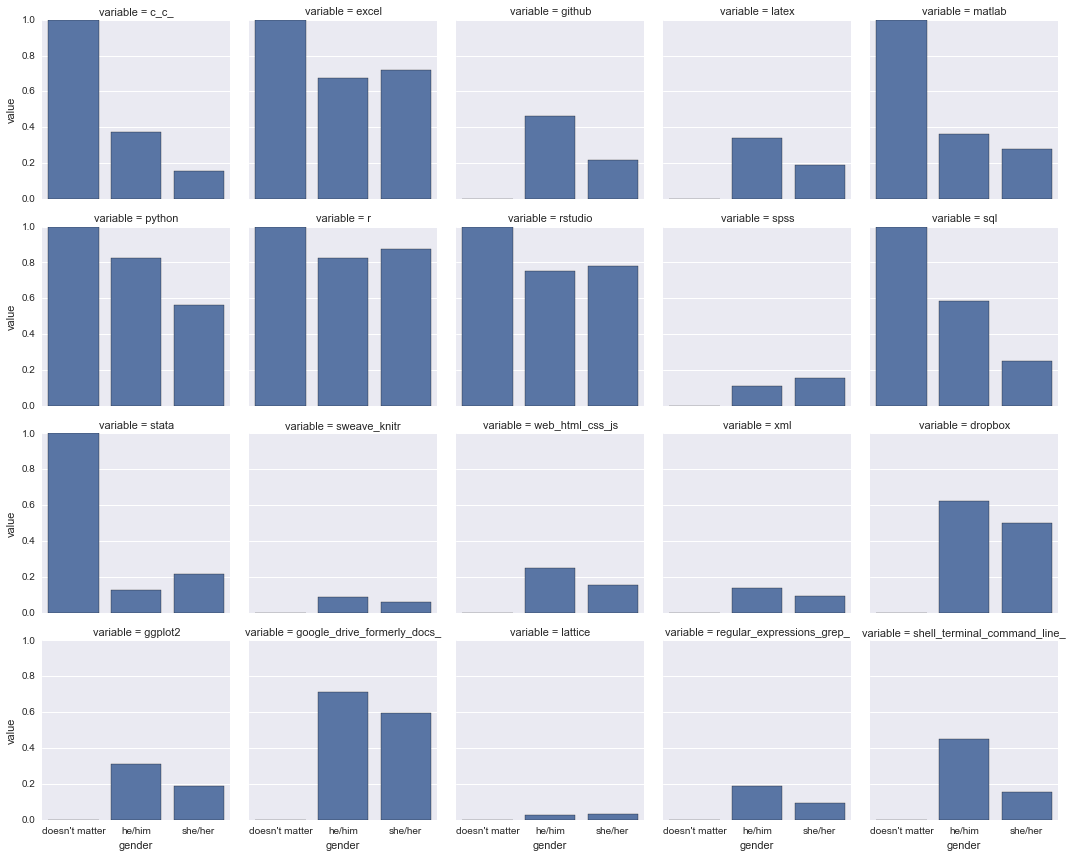

In [22]:
g = sns.FacetGrid(by_gender, col="variable", col_wrap=5)
g = g.map(sns.barplot, 'gender', 'value')

In [23]:
corr = to_facet.groupby(['program', 'gender']).mean().reset_index().corr()

In [24]:
qcorr = to_facet[to_facet.program == 'IDSE (master)'].corr()

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


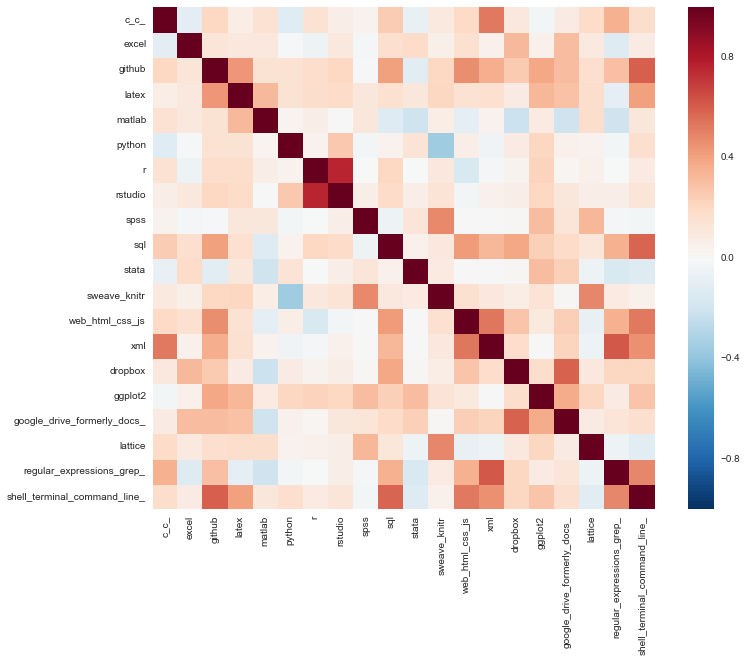

In [25]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(qcorr, vmax=1, square=True)

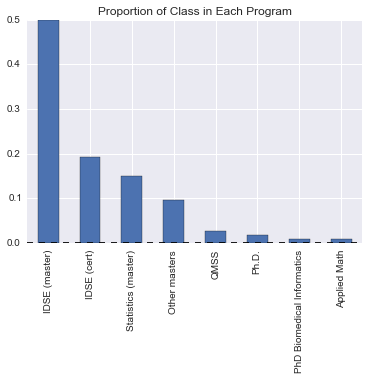

In [26]:
(survey.program.value_counts() / survey.program.count()).plot(kind='bar').set_title('Proportion of Class in Each Program')

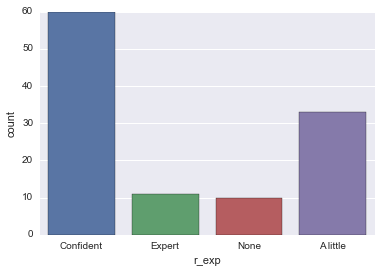

In [28]:
sns.countplot(survey.r_exp)

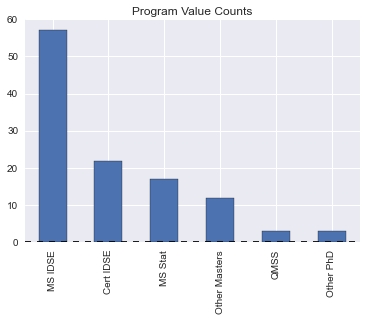

In [79]:
survey.program.value_counts().plot(kind='bar').set_title('Program Value Counts')

In [80]:
survey.gender.value_counts()

Male       80
Female     32
Unknown     2
dtype: int64

In [81]:
survey.value_counts()

AttributeError: 'DataFrame' object has no attribute 'graphics_exp'

In [30]:
survey.advanced_analysis_exp.value_counts()

A little     57
None         33
Confident    22
Expert        2
dtype: int64

In [31]:
survey.doc_exp.value_counts()

None         43
A little     39
Confident    26
Expert        6
dtype: int64

In [32]:
survey.matlab_exp.value_counts()

None         45
A little     44
Confident    24
Expert        1
dtype: int64

In [33]:
survey.github_exp.value_counts()

A little     48
None         35
Confident    28
Expert        3
dtype: int64

In [35]:
survey['toolcount'] = survey.tools.apply(lambda s: len(s.split(', ')))

In [ ]:
experience_factors = survey[experience_cols].replace({'None': 0, 'A little': 1, 'Confident': 2, 'Expert': 3})
survey['experience'] = experience_factors.sum(axis=1)

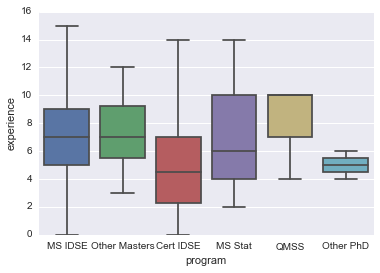

In [132]:
sns.boxplot(x='program', y='experience', data=survey)
plt.figure(figsize=(6,4))

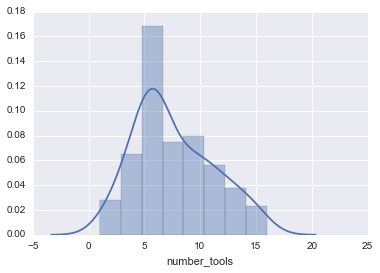

In [138]:
sns.distplot(survey.number_tools)

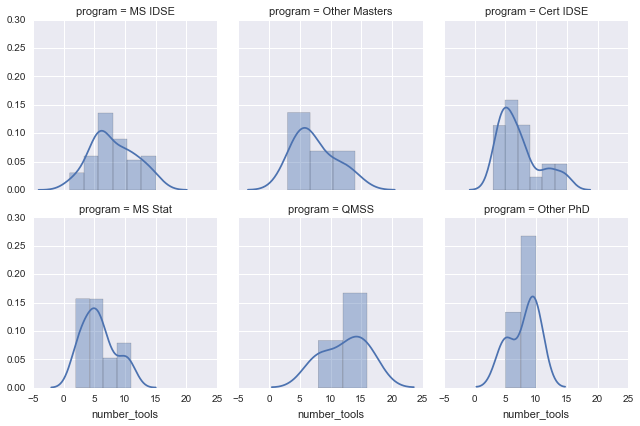

In [139]:
g = sns.FacetGrid(survey, col="program", col_wrap=3)
g = g.map(sns.distplot, 'number_tools')

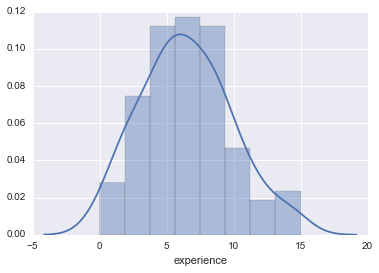

In [134]:
sns.distplot(survey.experience)

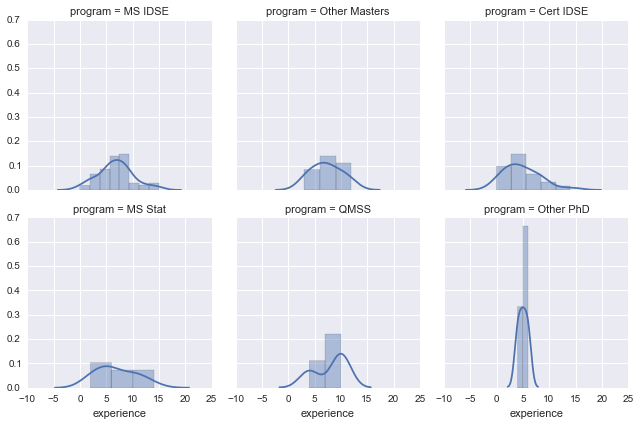

In [137]:
g = sns.FacetGrid(survey, col="program", col_wrap=3)
g = g.map(sns.distplot, 'experience')

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


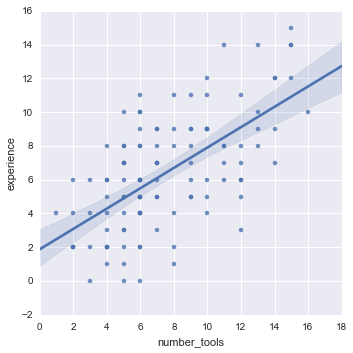

In [128]:
sns.lmplot(x='number_tools', y='experience', data=survey)

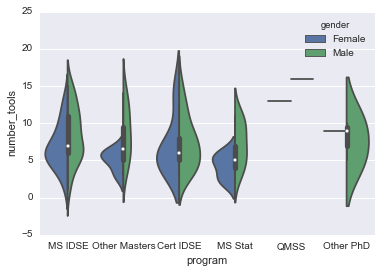

In [147]:
sns.violinplot(x="program", y="number_tools", hue="gender", 
               data=survey[survey.gender.isin(['Male', 'Female'])], split=True);

In [153]:
tool_cols = survey.columns[11:-2]

In [169]:
survey.to_csv('../data/survey_clean_exp.csv', index=False, encoding='utf-8')

In [161]:
X = survey[tool_cols].replace({True: 1, False: 0})

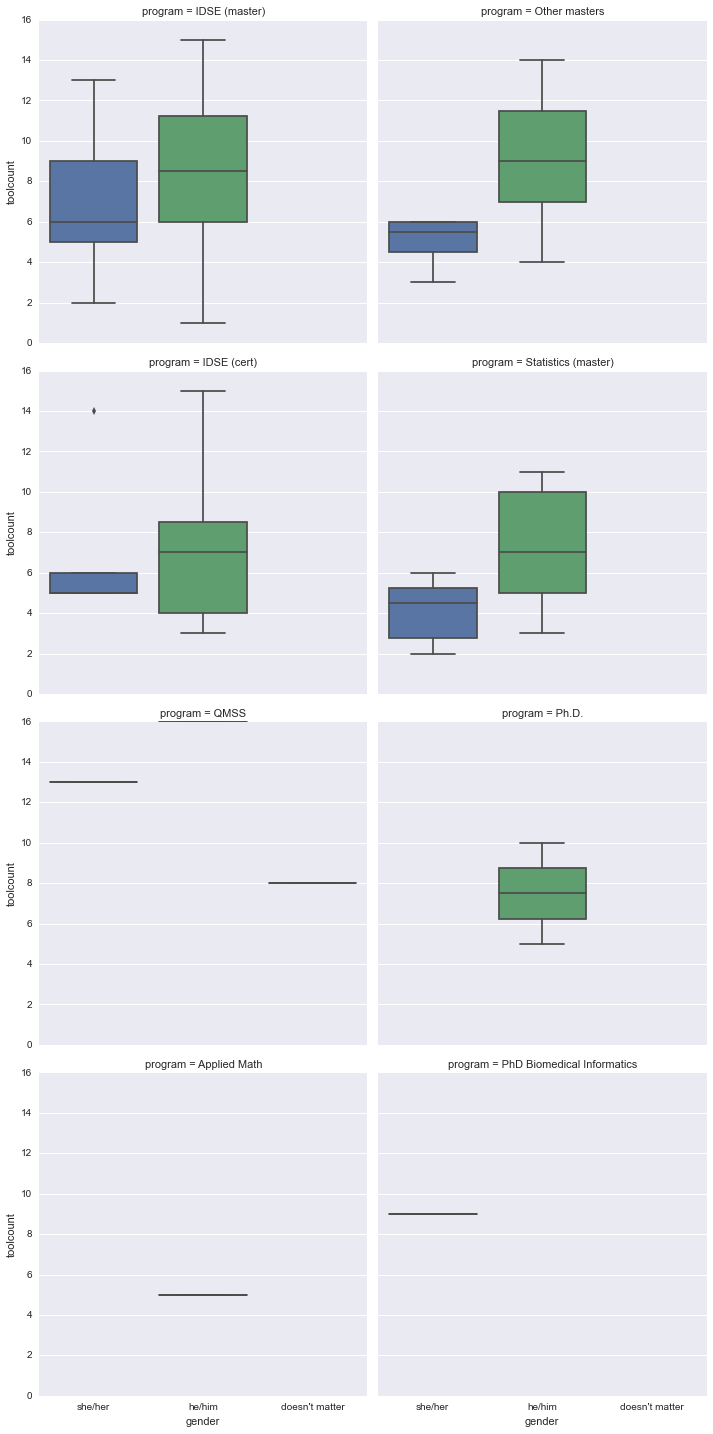

In [46]:
sns.factorplot(x="gender", y="toolcount", col_wrap=2,
               col="program", data=survey, kind="box", size=5, aspect=1);

### Clusters

In [55]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [56]:
X = survey.ix[:, 12:-1].applymap(lambda x: 1 if x else 0)

In [31]:
# X -= X.mean()

In [57]:
similarities = euclidean_distances(X)

In [58]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)

In [74]:
pos = mds.fit(similarities).embedding_

In [60]:
# pos *= np.sqrt((X ** 2).sum()) / np.sqrt((pos ** 2).sum())

In [61]:
# clf = PCA(n_components=2)
# X = clf.fit_transform(X)

# pos = clf.fit_transform(pos)

In [62]:
pos_df = pd.DataFrame(pos, columns=['x', 'y'])

In [75]:
pos_df['program'] = survey.program
pos_df['gender'] = survey.gender

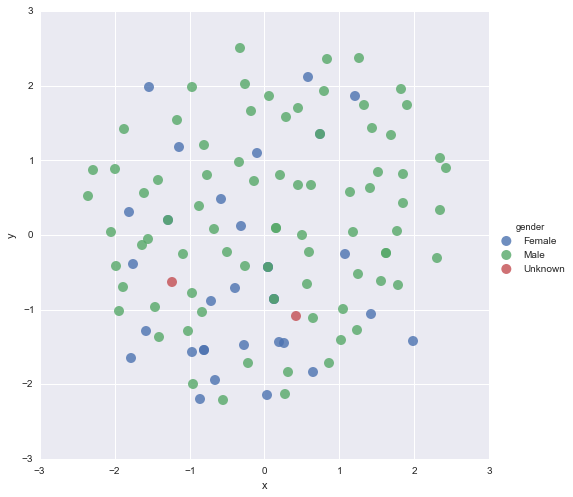

In [76]:
sns.lmplot('x', 'y', data=pos_df, hue='gender', fit_reg=False, size=7, scatter_kws={"s": 100})